# RFM Analysis 
**By Ibrahim Youssef**

RFM 
is a method of customer segmentation where it takes into account when was the last time a customer bought from you and how many times, they bought from you and how much they spend on your product  

RFM stands for 
- Recency: How recently a customer has made a purchase.
- Frequency: How often a customer makes a purchase.
- Monetary Value: How much money a customer spends on purchases.

And in this notebook, we will demonstrate Customer Segmentation using RFM on 
this data set in this link her https://archive-beta.ics.uci.edu/ml/datasets/online+retail

The download link for the data set https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
To read more one RFM here this article from Investopedia  https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp

And the article from fourweekmba in Arabic https://fourweekmba.com/ar/%D8%AA%D8%AD%D9%84%D9%8A%D9%84-rfm/  

# Getting the toolkits 

In [1]:
import requests 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
 warnings.filterwarnings("ignore")

# Getting the data 

In [3]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
data=pd.read_excel(url)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## BackUp the data

In [4]:
data_back=data.copy()

## Saving the Data

In [5]:
data.to_excel('online retail.xlsx')
# calling the data localy if needed
#data=pd.read_excel('online retail.xlsx')

# Data Cleaning and preperation 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


the data types seems to be correct for the columns but we seem to have missing values 

## What are the columns with missing values?

In [7]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

looking at the data we seem to have a lot of customer ID missing from the data we can't work with this type of data as it holds no way to identify the customer 

## Removing values without Customer ID

In [8]:
data=data.loc[data['CustomerID'].isna()==False]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [9]:
data.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
419652,572848,23489,VINTAGE BELLS GARLAND,6,2011-10-26 12:19:00,2.89,16188.0,United Kingdom
294170,562688,22586,FELTCRAFT HAIRBAND PINK AND BLUE,4,2011-08-08 13:53:00,0.85,13869.0,United Kingdom
320544,564995,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,6,2011-08-31 16:09:00,3.25,16780.0,United Kingdom
498425,578519,85184C,SET 4 VALENTINE DECOUPAGE HEART BOX,1,2011-11-24 13:56:00,2.95,14591.0,United Kingdom
199985,554108,21754,HOME BUILDING BLOCK WORD,2,2011-05-22 14:29:00,5.95,13668.0,United Kingdom
213746,555554,82494L,WOODEN FRAME ANTIQUE WHITE,6,2011-06-05 13:46:00,2.95,13742.0,United Kingdom
384803,570180,85049A,TRADITIONAL CHRISTMAS RIBBONS,12,2011-10-07 14:28:00,1.25,17509.0,United Kingdom
140830,C548469,22624,IVORY KITCHEN SCALES,-4,2011-03-31 12:32:00,7.65,14543.0,United Kingdom
499240,578662,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,2,2011-11-24 16:51:00,2.95,17516.0,United Kingdom
161867,550493,21669,BLUE STRIPE CERAMIC DRAWER KNOB,96,2011-04-18 14:50:00,1.06,15311.0,United Kingdom


Reading the Documentation on this data set we also seem to have cancelled orders in this data set
this can be seen in the invoice number as a C letter in front of the number 

## Removing cancelled orders 

In [10]:
data['InvoiceNo'].str.contains('C').count()

8905

In [11]:
data=data.loc[data['InvoiceNo'].str.contains('C')!=True]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


## Adding a total price column  

In [12]:
data['Total_price']=data['Quantity']*data['UnitPrice']

In [13]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


# Exploratory Data Analysis

## What are the types of products in sales quantity we have in this data set? 

Text(0.5, 1.0, 'Top 20 Products in sales Quantity')

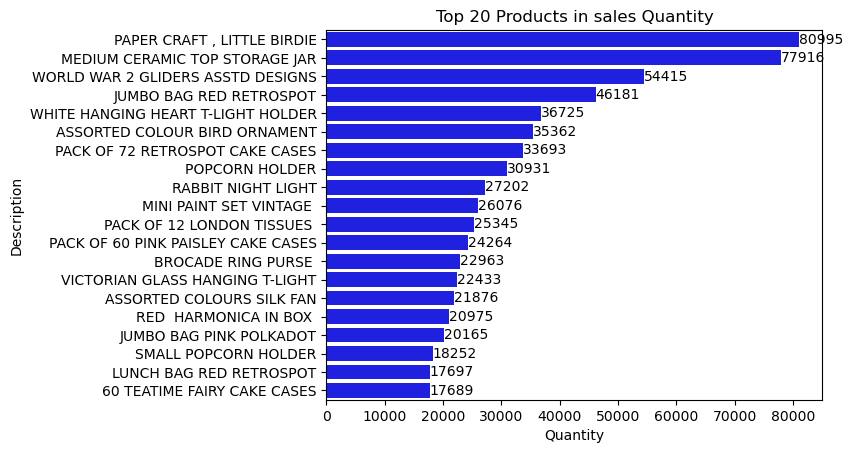

In [14]:
data_descripe=data.groupby('Description').agg({'Quantity':'sum'}).sort_values('Quantity',ascending=False).head(20).reset_index()
ax=sns.barplot(data=data_descripe,y='Description',x='Quantity',color='b')
ax.bar_label(ax.containers[0])
plt.title('Top 20 Products in sales Quantity')

## What are the types of products in total sales we have in this data set? 

Text(0.5, 1.0, 'Top 20 Products in total sales')

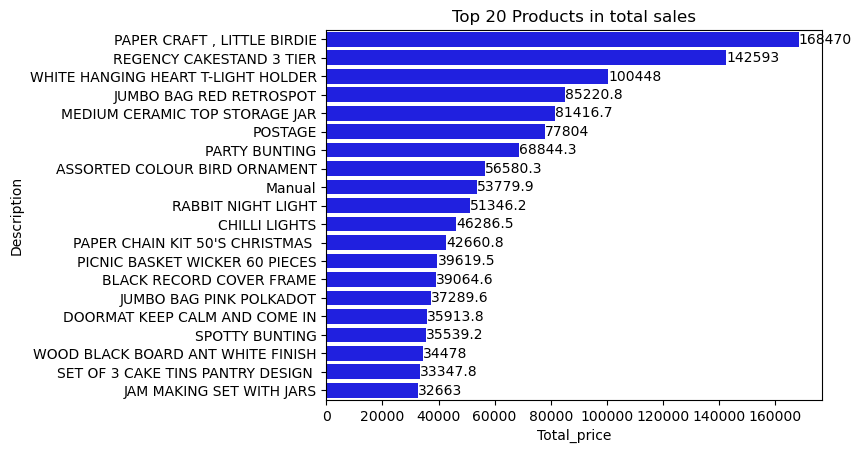

In [15]:
data_descripe2=data.groupby('Description').agg({'Total_price':'sum'}).sort_values('Total_price',ascending=False).head(20).reset_index()
ax=sns.barplot(data=data_descripe2,y='Description',x='Total_price',color='b')
ax.bar_label(ax.containers[0])
plt.title('Top 20 Products in total sales')

## What are the top countries in sales? 

Text(0.5, 1.0, 'Top 20 Countries in sales value')

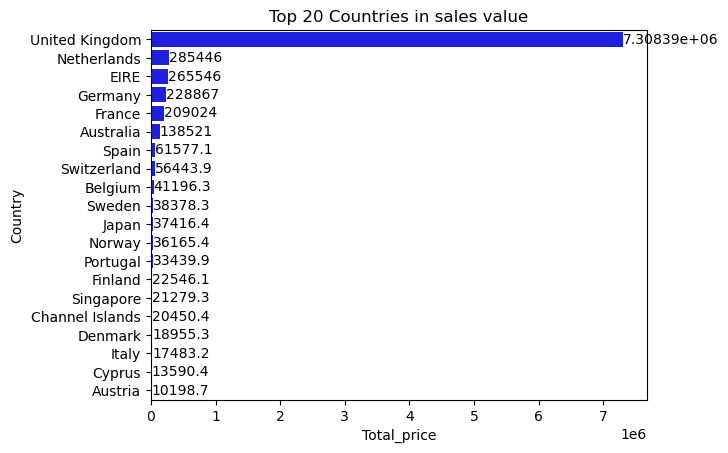

In [16]:
data_country=data.groupby('Country').agg({'Total_price':'sum'}).sort_values('Total_price',ascending=False).head(20).reset_index()
ax=sns.barplot(data=data_country,y='Country',x='Total_price',color='b')
ax.bar_label(ax.containers[0])
plt.title('Top 20 Countries in sales value')



# Prepare the RFM main table

## First let's set the datetime for this notebook and

In [17]:
import datetime as dt

In [18]:
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [19]:
today_date=dt.datetime(2011,12,12)

## Building the RFM Table 
After the date time is sorted let's get our table made for the analysis 

In [20]:
data_rfm=data.groupby('CustomerID').agg({'InvoiceDate':lambda date:(today_date-date.max()).days ,
                                        'Quantity':lambda number:number.nunique() ,
                                        'Total_price':lambda Total_price:Total_price.sum()})

In [21]:
data_rfm.columns=['Recency','Frequency','Monetary Value' ]

We can then remove the zero monetary value customers as they have no value to them

In [22]:
data_rfm=data_rfm.loc[data_rfm['Monetary Value']!=0]

In [23]:
data_rfm

,Recency,Frequency,Monetary Value
CustomerID,,,
12346.0,327,1,77183.60
12347.0,4,15,4310.00
12348.0,77,10,1797.24
12349.0,20,12,1757.55
12350.0,312,5,334.40
...,...,...,...
18280.0,279,5,180.60
18281.0,182,4,80.82
18282.0,9,8,178.05


## Scaling the Data
after we have the Date prepared, we need to scale every column we have from 1 to 5 as this will but context to the data at hand 

In [24]:
data_rfm['Recency_Score']=pd.qcut(data_rfm['Recency'],5,labels=[5,4,3,2,1])
data_rfm['Frequency_Score']=pd.qcut(data_rfm['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
data_rfm['Monetary Value_Score']=pd.qcut(data_rfm['Recency'],5,labels=[1,2,3,4,5])
data_rfm

,Recency,Frequency,Monetary Value,Recency_Score,Frequency_Score,Monetary Value_Score
CustomerID,,,,,,
12346.0,327,1,77183.60,1,1,5
12347.0,4,15,4310.00,5,5,1
12348.0,77,10,1797.24,2,3,4
12349.0,20,12,1757.55,4,4,2
12350.0,312,5,334.40,1,1,5
...,...,...,...,...,...,...
18280.0,279,5,180.60,1,2,5
18281.0,182,4,80.82,1,1,5
18282.0,9,8,178.05,5,3,1


## priorities 
Now here we need to take a look at our priorities for the business as an online business and most business out there the current order (Recency, Frequency, Monetary Value) works fine

**But**

We might need to change around for other business that sell high value goods
so to creat the RFM score we need to add the 

In [25]:
data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Recency               4338 non-null   int64   
 1   Frequency             4338 non-null   int64   
 2   Monetary Value        4338 non-null   float64 
 3   Recency_Score         4338 non-null   category
 4   Frequency_Score       4338 non-null   category
 5   Monetary Value_Score  4338 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 148.9 KB


## Lets get the RFM score per customer 

In [26]:
data_rfm['RFM_Score']=(data_rfm['Recency_Score'].astype(str))+(data_rfm['Frequency_Score'].astype(str))+data_rfm['Monetary Value_Score'].astype(str)
data_rfm['RFM_Score']=data_rfm['RFM_Score'].astype('object')
data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Recency               4338 non-null   int64   
 1   Frequency             4338 non-null   int64   
 2   Monetary Value        4338 non-null   float64 
 3   Recency_Score         4338 non-null   category
 4   Frequency_Score       4338 non-null   category
 5   Monetary Value_Score  4338 non-null   category
 6   RFM_Score             4338 non-null   object  
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 182.8+ KB


## Let's Segment the Customer 

based on the current number lets segment the current customer 

In [27]:
rfm_map={
    r'[1-2][1-2][1-2]':'Inactive',
    r'[2-3][2-3][2-3]':'Average',
    r'[3-4][3-4][3-4]':'promising',
    r'[4-5][4-5][4-5]':'Top customer',
    r'[1-2][1-2][4-5]':'Need To Earn his Trust',
    r'[4-5][1-2][1-2]':'New Customers',
    r'[4-5][1-2][4-5]':'New Promising Customer',
    r'[1-2][4-5][4-5]':'A big loss to the business',
    r'[2-3][4-5][4-5]':'Someone we are losing',
    r'[3-4][1-2][3-4]':'About to Leave',
    r'[4-5][4-5][1-2]':'Need Spending Incentives',
    r'[4-5][3-4][1-2]':'Regular on a budget',
    r'[3-4][4-5][3-4]':'Average Frequenter',
    r'[1-2][2-3][4-5]':'One Time Spending Spree',
    r'[1-2][1-2][4-5]':'One Hit wonder'}
data_rfm['Customer_Segment']=data_rfm['RFM_Score'].replace(rfm_map, regex=True)
data_rfm.sample(20)

,Recency,Frequency,Monetary Value,Recency_Score,Frequency_Score,Monetary Value_Score,RFM_Score,Customer_Segment
CustomerID,,,,,,,,
15452.0,31,11,538.73,4,4,2,442,Need Spending Incentives
14414.0,93,15,1496.98,2,5,4,254,A big loss to the business
14161.0,217,12,1110.52,1,4,5,145,A big loss to the business
15939.0,91,20,6115.01,2,5,4,254,A big loss to the business
13322.0,19,6,199.48,4,2,2,422,New Customers
15074.0,107,7,748.87,2,2,4,224,One Hit wonder
14525.0,21,22,4332.20,4,5,2,452,Need Spending Incentives
14794.0,4,11,1319.91,5,4,1,541,Need Spending Incentives
18011.0,375,7,102.79,1,2,5,125,One Hit wonder


## Segmentation 

Text(0.5, 0, 'Number of customer')

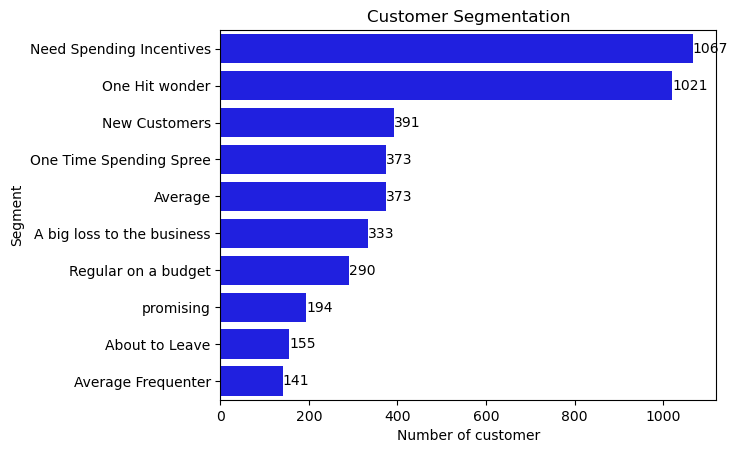

In [28]:
customer_seg=data_rfm['Customer_Segment'].value_counts().reset_index()
ax=sns.barplot(data=customer_seg,x='Customer_Segment',y='index',color='b')
ax.bar_label(ax.containers[0])
plt.title('Customer Segmentation')
plt.ylabel('Segment')
plt.xlabel('Number of customer')

# Conclusion
After the segmentation is done, we will be able to direct the marketing team based on the segments we have to create campaigns to target the customers with more knowledge ahead of time this will help us work

- For Example, the customers that need spending incentives can be targeted to buy more expensive items from your business
- or the big loss to the business that need  immediate attention from your business to solve their problems
- or the one-time spending spree who clearly came for a reason and stayed but never came back after this time

In short, this analysis opens more Questions from the data than it answers but without it, we would be lost with our customers and business

# Data Exportation 

In [29]:
writer = pd.ExcelWriter('Customer segmentation.xlsx', engine='xlsxwriter')
data_rfm.to_excel(writer,sheet_name='customers')
customer_seg.to_excel(writer,sheet_name='Segments')
data_descripe.to_excel(writer,sheet_name='Top sales discription')
data_descripe2.to_excel(writer,sheet_name='Top sales discription val')
data_country.to_excel(writer,sheet_name='Top sales Country')
writer.save()